In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("AdultUCI.csv")
df = pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
clean_df = df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                 'race', 'sex', 'native-country'])
clean_df = clean_df.dropna()
clean_df.dtypes

age                int64
fnlwgt             int64
education-num      int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
income            object
dtype: object

In [5]:
print(len(clean_df))

32561


In [6]:
x = clean_df.drop('income',axis=1)
x = x.rename(columns={'education-num':'education_num', 'capital-gain':'capital_gain',
                  'capital-loss':'capital_loss', 'hours-per-week':'hours_per_week'})
y = clean_df[['income']].copy()
clusterdata=x.copy()
for i in range(clusterdata.shape[1]):
    clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])

In [7]:
print(len(clusterdata))
print(len(x))
print(len(y))

32561
32561
32561


In [8]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

#Perform k-means analysis, as well as check the average within cluster distances vs. different k values
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))
    / clusterdata.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

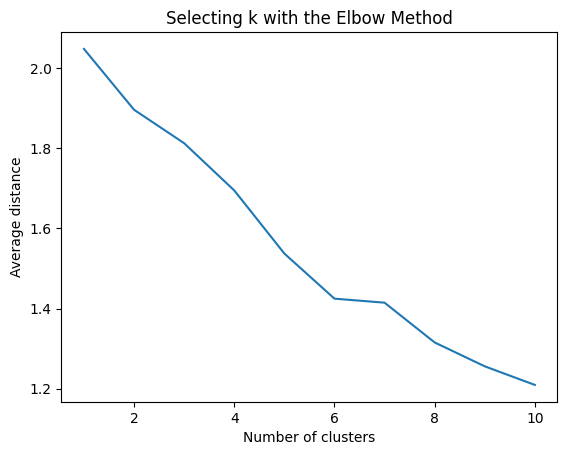

In [9]:
%matplotlib inline
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [10]:
model = KMeans(n_clusters=2)
model.fit(clusterdata)
predY = np.choose(model.labels_, [0, 1]).astype(np.int64)

In [11]:
y_binary = clean_df['income'].map({'small': 0, 'large': 1}).reset_index(drop=True)
y_binary_df = pd.DataFrame(y_binary, columns=['income_binary'])

y_binary_df = pd.DataFrame({'income_binary': clean_df['income'].map({'small': 0, 'large':1})})
y_binary_df.head()

,income_binary
0,0
1,0
2,0
3,0
4,0


In [12]:
print(len(x))
print(len(y_binary_df))

32561
32561


Text(0.5, 1.0, 'K Means Clustering Result')

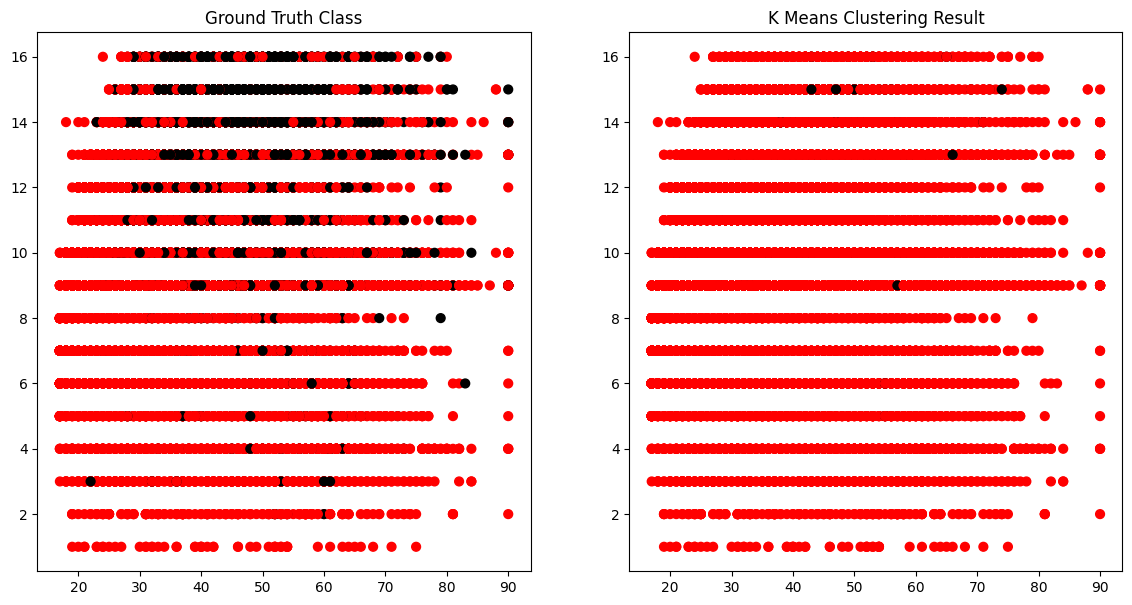

In [13]:
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.age, x.education_num, c=colormap[y_binary_df.income_binary], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.age, x.education_num, c=colormap[model.labels_], s=40)
plt.title('K Means Clustering Result')

Text(0.5, 1.0, 'K Means Clustering Result')

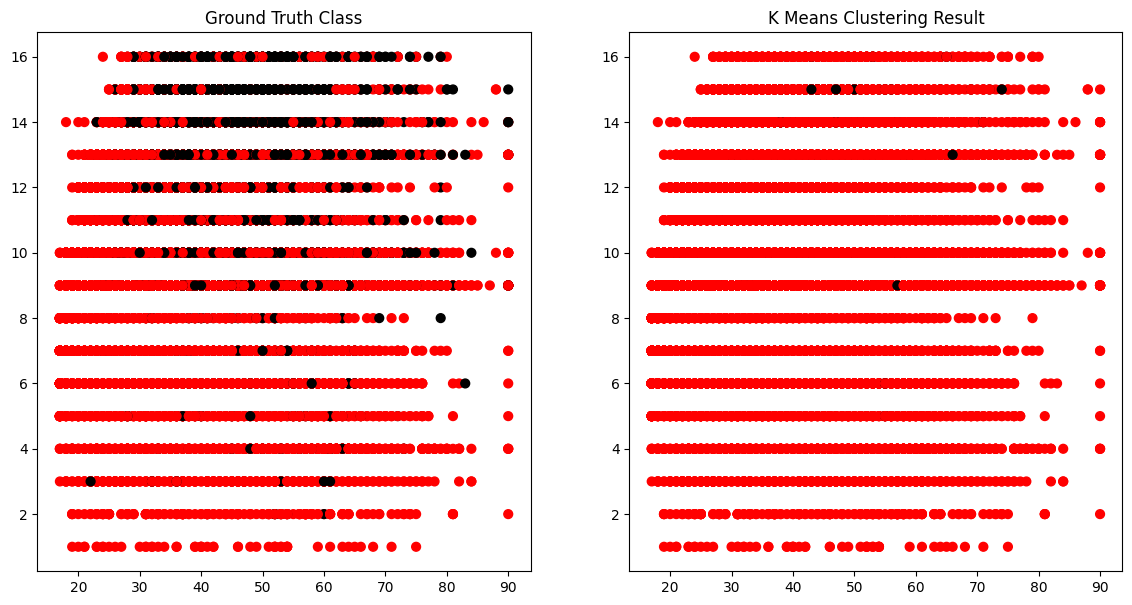

In [14]:
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.age, x.education_num, c=colormap[y_binary_df.income_binary], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.age, x.education_num, c=colormap[predY], s=40)
plt.title('K Means Clustering Result')

In [15]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_binary_df, predY)

array([[24720,     0],
       [ 7682,   159]], dtype=int64)

In [16]:
sklearn.metrics.accuracy_score(y_binary_df, predY)

0.7640735849636068